# Version VI - Geometry operations data augmentation

### Imports and initial setup

In [1]:
import import_ipynb

from InitialSetup import dataset, BATCH_SIZE, tf, prepare_callbacks, model_VI, show_history, test_dataset, AUTOTUNE, process_rotate, process_crop, process_translate, process_shear

importing Jupyter notebook from InitialSetup.ipynb
Num GPUs Available:  1
Total images in validatation dataset:  12630
(32, 32, 3) (43,)
Total images in dataset:  39209


In [2]:
dataSoloV6 = dataset
dataSoloV6 = dataSoloV6.concatenate(dataset.map(process_rotate))
dataSoloV6 = dataSoloV6.concatenate(dataset.map(process_shear))
dataSoloV6 = dataSoloV6.concatenate(dataset.map(process_translate))
dataSoloV6 = dataSoloV6.concatenate(dataset.map(process_crop))

dataSoloV6_size = tf.data.experimental.cardinality(dataSoloV6).numpy()

dataSoloV6 = dataSoloV6.cache()
dataSoloV6 = dataSoloV6.shuffle(buffer_size = dataSoloV6_size)
dataSoloV6 = dataSoloV6.batch(batch_size = BATCH_SIZE)
dataSoloV6 = dataSoloV6.prefetch(buffer_size = AUTOTUNE)
dataSoloV6 = dataSoloV6.repeat()

train_size = int(0.8* dataSoloV6_size)
val_size = int(0.2* dataSoloV6_size)

train_dataset = dataSoloV6.take(train_size)
val_dataset = dataSoloV6.skip(train_size)

### Setup model and save place

In [3]:
modelV6 = model_VI(43, 32, 3)

file_pathV6 = './Networks/GeometryOperationsDataAugmentation.ckpt'

callbacksV6 = prepare_callbacks(file_pathV6)

### Train model

In [4]:
historyV6 = modelV6.fit(train_dataset, steps_per_epoch = train_size/BATCH_SIZE,
          epochs=20, 
          validation_data = val_dataset, 
          validation_steps = val_size/BATCH_SIZE,
          callbacks = callbacksV6)

Epoch 1/20
2450/2450 [==============================] - 120s 29ms/step - loss: 2.2599 - accuracy: 0.4110 - val_loss: 0.2273 - val_accuracy: 0.9360

Epoch 00001: val_accuracy improved from -inf to 0.93605, saving model to ./Networks\GeometryOperationsDataAugmentation.ckpt
Epoch 2/20
2450/2450 [==============================] - 73s 30ms/step - loss: 0.3654 - accuracy: 0.8893 - val_loss: 0.0622 - val_accuracy: 0.9827

Epoch 00002: val_accuracy improved from 0.93605 to 0.98272, saving model to ./Networks\GeometryOperationsDataAugmentation.ckpt
Epoch 3/20
2450/2450 [==============================] - 71s 29ms/step - loss: 0.1597 - accuracy: 0.9520 - val_loss: 0.0279 - val_accuracy: 0.9931

Epoch 00003: val_accuracy improved from 0.98272 to 0.99307, saving model to ./Networks\GeometryOperationsDataAugmentation.ckpt
Epoch 4/20
2450/2450 [==============================] - 71s 29ms/step - loss: 0.0958 - accuracy: 0.9721 - val_loss: 0.0140 - val_accuracy: 0.9963

Epoch 00004: val_accuracy improve

### Show the learning history

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy', 'lr'])


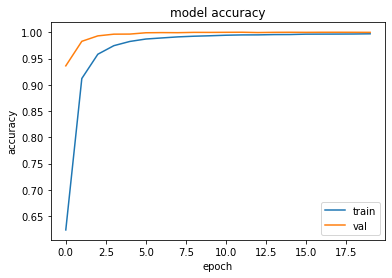

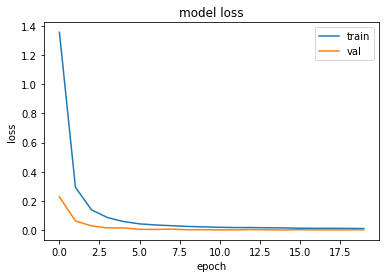

In [5]:
show_history(historyV6)

### Load weights from file and test with validation and test dataset

In [6]:
modelV6.load_weights(file_pathV6)

evalV6 = modelV6.evaluate(test_dataset, verbose=2)
valV6 = modelV6.evaluate(val_dataset, steps=val_size/BATCH_SIZE, verbose=2)

198/198 - 2s - loss: 0.0406 - accuracy: 0.9884
612/612 - 24s - loss: 8.8393e-04 - accuracy: 0.9999
